In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
#Load the clean data sample from phase 1
df = pd.read_csv('https://raw.githubusercontent.com/INFO590-Pythoneers/Final-Project-Repo/master/Phase%202/Data/BreastCancerWisconsinUpdate.csv')
print(df.head())

       Scn  A2  A3  A4  A5  A6    A7  A8  A9  A10  CLASS
0  1000025   5   1   1   1   2   1.0   3   1    1      2
1  1002945   5   4   4   5   7  10.0   3   2    1      2
2  1015425   3   1   1   1   2   2.0   3   1    1      2
3  1016277   6   8   8   1   3   4.0   3   7    1      2
4  1017023   4   1   1   3   2   1.0   3   1    1      2


In [3]:
#Slice the dataframe to include only columns A2 through A10.
dfslice = df[['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]

#Use KMeans clustering with n = 4 clusters.
model = KMeans(n_clusters=4)
model.fit(dfslice)

#Find the centroid locations per cluster.
centroids=model.cluster_centers_.round(4)
print('Centroids:\n')
print(centroids)

#----------NOTE - I commented out this plot since it wasn't required, but we can add it back if desired.
#centroids_x = centroids[:,0]
#centroids_y = centroids[:,1] 
#Plot the centroids
#plt.scatter(centroids_x, centroids_y)

Centroids:

[[2.9449 1.2445 1.3656 1.293  2.0396 1.3514 2.0617 1.2004 1.0771]
 [7.234  4.8511 5.0426 4.8617 4.117  9.383  5.266  3.7872 1.6489]
 [7.4648 7.0282 6.6761 4.1972 5.5352 3.4532 5.3803 6.8169 2.3099]
 [6.7625 8.3875 8.425  7.75   6.775  9.2125 7.375  7.7375 3.7875]]


### Evaluate the optimal number of clusters

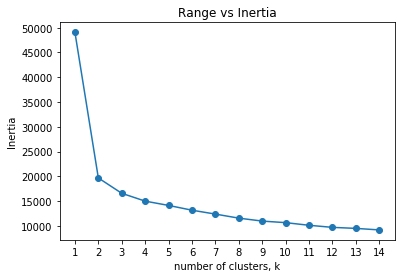

In [4]:
# make a range from 1 to 15
ks = range(1, 15)

# create an empty list
inertias = []

# for loop to calculate KMeans for each values 
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(dfslice)    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot Range vs Inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

##### The optimal number of clusters is determined when inertia begins to decrease at a slower pace, also known as the "elbow" in the inertia plot. In our data sample above the optimal number of clusters is two.  

In [5]:
'''Revise data variation 10pts
apply standard deviation function for columns A2-A10
plot standard deviation values - select a graphic that could display all nine values [do not use histogram], 
add title, legend, ylabel, xlabel. 
Can you capture how wide or narrow is the variation in each column?
describe which features have a lot of data variation'''

#Revision of data variation

#Find standard deviation of values in columns A2-A10
print('Standard deviation values for each column A2-A10:\n')
print(dfslice.std())

#----------Not sure what the best visualization would be for this data. 
#----------Was not able to plot 'A2-A10' on x axis with all the y values on y axis in a scatter plot.
#---------- Got error x and y must be same size...need to slice differently?

Standard deviation values for each column A2-A10:

A2     2.815741
A3     3.051459
A4     2.971913
A5     2.855379
A6     2.214300
A7     3.601852
A8     2.438364
A9     3.053634
A10    1.715078
dtype: float64
